Create several datasets with the builder and visualize

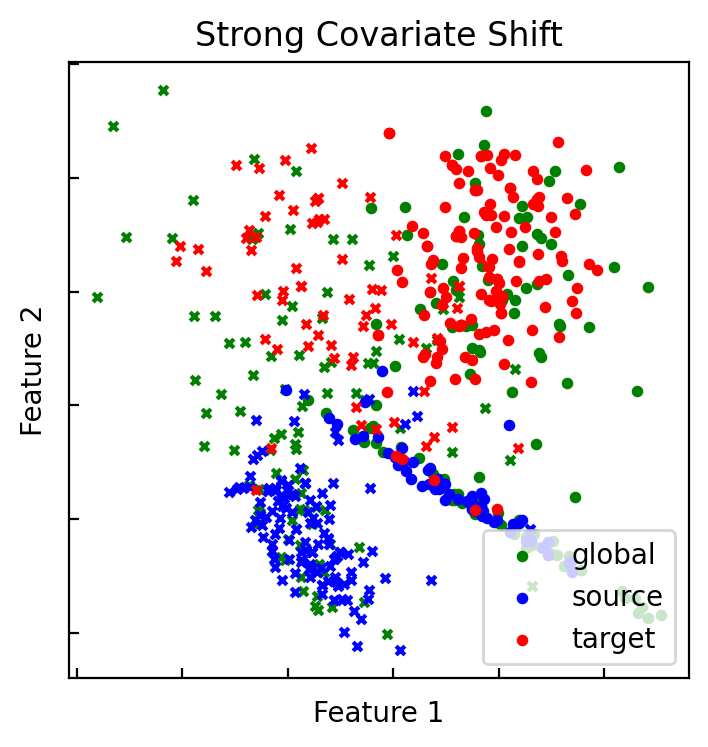

num-global: 200
uniqueness-global: 1.0
class-marginal-global: 0.535
num-source: 200
uniqueness-source: 0.885
class-marginal-source: 0.315
num-target: 200
uniqueness-target: 0.915
class-marginal-target: 0.665


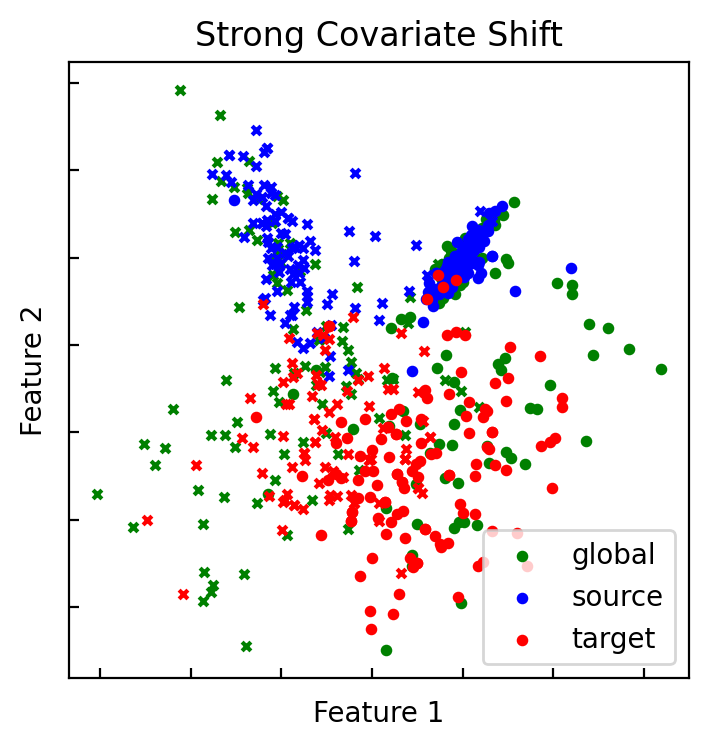

num-global: 200
uniqueness-global: 1.0
class-marginal-global: 0.52
num-source: 200
uniqueness-source: 0.94
class-marginal-source: 0.5
num-target: 200
uniqueness-target: 0.89
class-marginal-target: 0.585


In [13]:
from datagen.covshift.selector import  FeatureSelector
from datagen.covshift.builder import  CovShiftBuilder
from datagen.visualize import visualize_shift2d_px, visualize_shift3d_px, visualize_shift2d
from evaluate.evaluate import analyze_data

# configure dataset generation
init_classification = dict(n_samples=5000, n_features=2, n_informative=2, n_repeated=0, n_redundant=0)
selector = FeatureSelector(n_global=200, n_source=200, n_target=200, source_scale=.75, target_scale=.75, bias_dist=3)
builder = CovShiftBuilder(init_classification, selector)

runs = 2
for _ in range(runs):
    data = builder.generate()
    # visualize_shift2d_px(*data)
    visualize_shift2d(*data, title="Strong Covariate Shift")
    metrics = analyze_data(data)
    for key in metrics:
        print(f"{key}: {metrics[key]}")

Finished generating dataset: 100%|██████████| 4/4 [00:00<00:00, 28.58it/s]


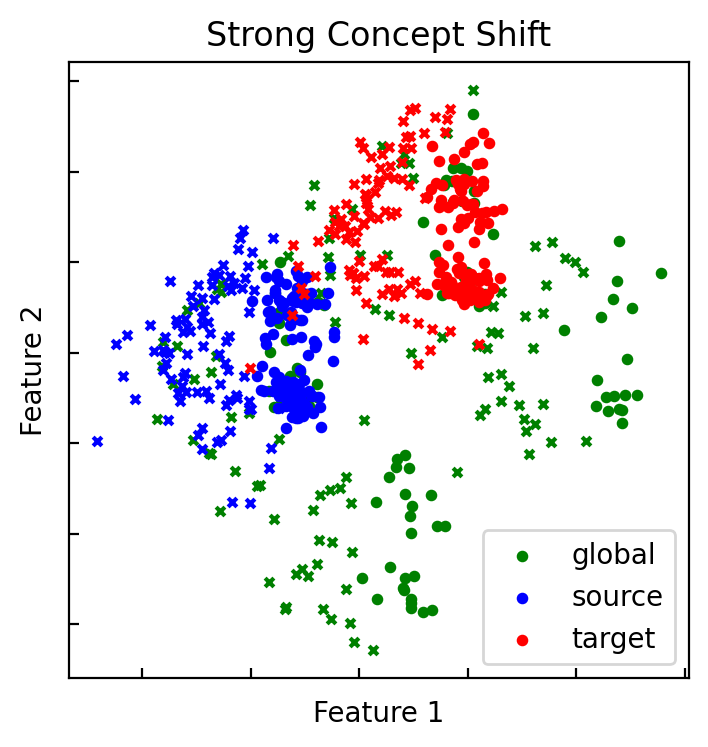

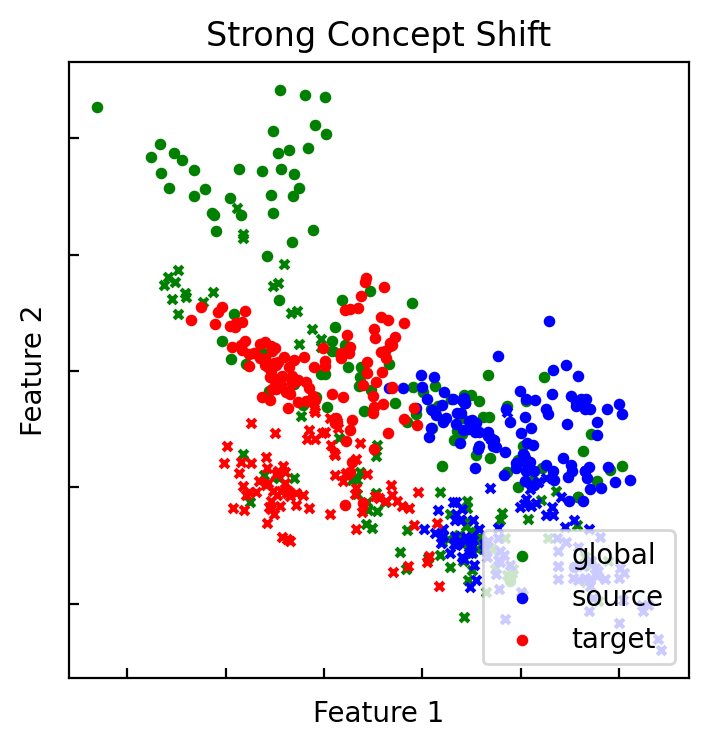

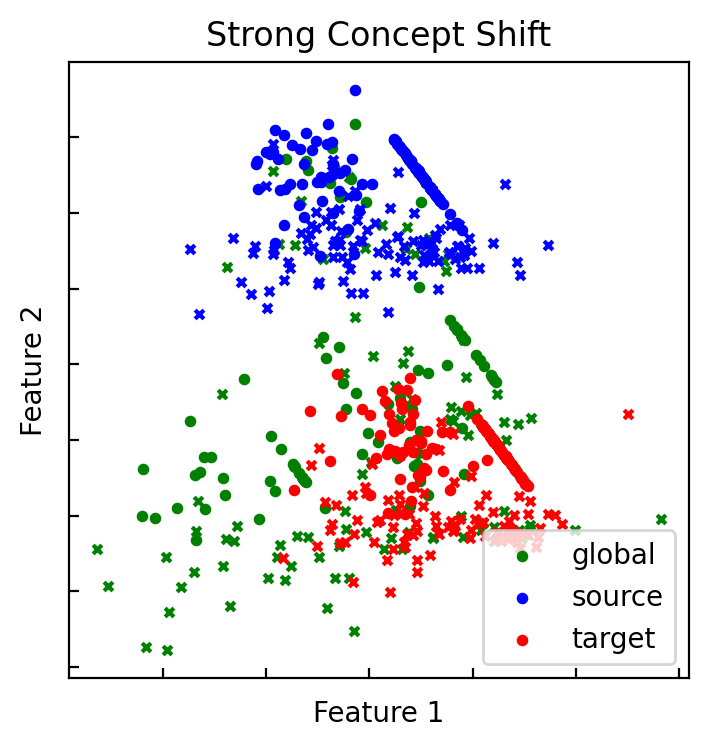

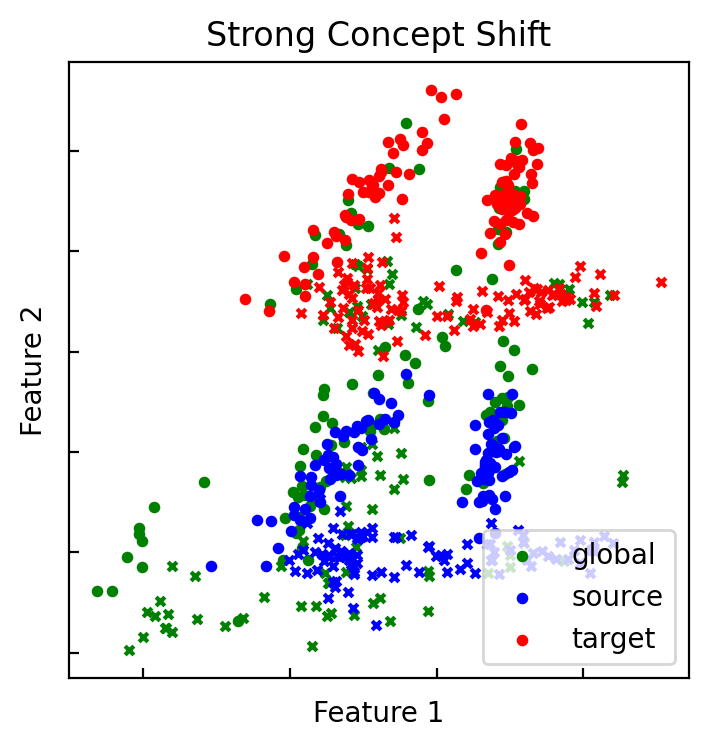

In [22]:
from datagen.conceptshift.selector import DomainSelector
from datagen.conceptshift.shifter import Shifter
from datagen.conceptshift.builder import ConceptShiftDataBuilder
from datagen.visualize import visualize_shift2d, visualize_shift2d_px, visualize_shift3d_px
from evaluate.evaluate import analyze_data
from util.run import run_generate
from util.batch import batch_generate

# configure dataset generation
init_classification = dict(n_samples=2500, n_features=2, n_informative=2, n_repeated=0, n_redundant=0)
shifter = Shifter(n_domains=4, rot=0, trans=4, scale=0)
selector = DomainSelector(n_global=200, n_source=200, n_target=200, n_domains_source=1, n_domains_target=1)

builder = ConceptShiftDataBuilder(init_classification, shifter, selector)

runs = 4
sets = batch_generate(builder, runs, "results\showdatashift")
for store, _ in sets:
    data = store.load_data()
    visualize_shift2d(*data, title="Strong Concept Shift")